In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

np.set_printoptions(precision=3, suppress=True)
tf.__version__

'2.4.1'

(3424, 3)


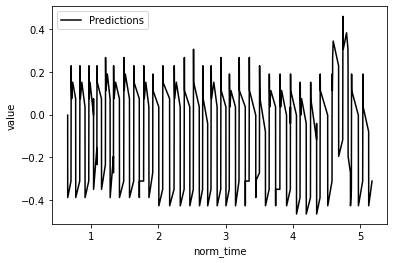

In [2]:
# Read dataset from file
raw_dataset = pd.read_csv("./data_grouped/1161114002_122.csv")
raw_dataset = raw_dataset.astype({'id':'float','value':'float', 'station_id':'int', 'parameter_id':'int', 'unix_timestamp':'int', 'norm_time':'float'})
dataset = raw_dataset.copy()
dataset = dataset.dropna().drop(['id','station_id','parameter_id','unix_timestamp'], axis=1)
dataset = dataset.sort_values(by=['norm_time'])
print(dataset.shape)
#dataset = dataset[0:300]
plotdata = dataset[2000:2500]


plt.plot(plotdata['norm_time'], plotdata['norm_value'], color='k', label='Predictions')
plt.xlabel('norm_time')
plt.ylabel('value')
plt.legend()
plt.show()

In [3]:
serial_data = dataset.drop(['value','norm_time'], axis=1)
serial_data['norm_1'] = serial_data['norm_value'].shift(1)
serial_data['norm_2'] = serial_data['norm_value'].shift(2)
serial_data['norm_3'] = serial_data['norm_value'].shift(3)
serial_data['norm_4'] = serial_data['norm_value'].shift(4)
serial_data['norm_5'] = serial_data['norm_value'].shift(5)
serial_data['norm_6'] = serial_data['norm_value'].shift(6)
serial_data = serial_data[6:]
serial_data.to_csv("./1161114002_122_norm.csv", index=False)

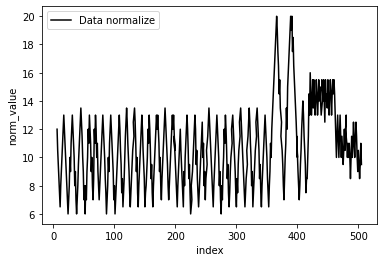

In [4]:
plot_serial = serial_data[0:500]
plt.plot(plot_serial.index, plot_serial['norm_value']*12.95969626+12.04030374, color='k', label='Data normalize')
plt.xlabel('index')
plt.ylabel('norm_value')
plt.legend()
plt.show()

In [5]:
# Split data into training and testing
train_dataset = serial_data.sample(frac=0.8, random_state=1)

# test_dataset = serial_data[900:1200]
test_dataset = serial_data.drop(train_dataset.index)

In [6]:
train_features = np.array(train_dataset.drop(['norm_value'], axis=1))
train_features = np.array(train_features)[:,:,np.newaxis]
train_features.shape

(2734, 6, 1)

In [7]:
train_labels = np.array(train_dataset.drop(['norm_6'], axis=1))
train_labels = train_labels.reshape(train_labels.shape[0],train_labels.shape[1],1)
train_labels.shape

(2734, 6, 1)

In [8]:
test_features = np.array(test_dataset.drop(['norm_value'], axis=1))
test_features = test_features.reshape(test_features.shape[0],test_features.shape[1],1)
test_features.shape
# a = train_features[0:2]
# print(a.shape)
# print(a[1])
# print(a[1][np.newaxis,:,:].shape)

(684, 6, 1)

In [9]:
test_labels = np.array(test_dataset.drop(['norm_6'], axis=1))
test_labels = test_labels.reshape(test_labels.shape[0],test_labels.shape[1],1)
test_labels.shape

(684, 6, 1)

In [10]:
model = keras.Sequential()
# model.add(layers.LSTM(128, return_sequences=True))
# model.add(layers.LSTM(128, return_sequences=True))
# model.add(layers.LSTM(128, return_sequences=True))
# model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.TimeDistributed(layers.Dense(1)))
# model.add(layers.Dense(6))
# model.add(layers.Dense(6))
# model.add(layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.005))

In [11]:
model.fit(train_features, train_labels, epochs=30, batch_size=1, verbose=2)

Epoch 1/200
2734/2734 - 5s - loss: 0.0037
Epoch 2/200
2734/2734 - 4s - loss: 0.0022
Epoch 3/200
2734/2734 - 4s - loss: 0.0022
Epoch 4/200
2734/2734 - 4s - loss: 0.0021
Epoch 5/200
2734/2734 - 4s - loss: 0.0021
Epoch 6/200
2734/2734 - 4s - loss: 0.0020
Epoch 7/200
2734/2734 - 5s - loss: 0.0020
Epoch 8/200
2734/2734 - 4s - loss: 0.0020
Epoch 9/200
2734/2734 - 4s - loss: 0.0020
Epoch 10/200
2734/2734 - 4s - loss: 0.0020
Epoch 11/200
2734/2734 - 4s - loss: 0.0020
Epoch 12/200
2734/2734 - 4s - loss: 0.0020
Epoch 13/200
2734/2734 - 4s - loss: 0.0020
Epoch 14/200
2734/2734 - 4s - loss: 0.0020
Epoch 15/200
2734/2734 - 4s - loss: 0.0020
Epoch 16/200
2734/2734 - 4s - loss: 0.0020
Epoch 17/200
2734/2734 - 4s - loss: 0.0020
Epoch 18/200
2734/2734 - 4s - loss: 0.0019
Epoch 19/200
2734/2734 - 4s - loss: 0.0019
Epoch 20/200
2734/2734 - 4s - loss: 0.0020
Epoch 21/200
2734/2734 - 4s - loss: 0.0019
Epoch 22/200
2734/2734 - 4s - loss: 0.0019
Epoch 23/200
2734/2734 - 4s - loss: 0.0019
Epoch 24/200
2734/27

Epoch 190/200
2734/2734 - 4s - loss: 0.0019
Epoch 191/200
2734/2734 - 4s - loss: 0.0019
Epoch 192/200
2734/2734 - 4s - loss: 0.0019
Epoch 193/200
2734/2734 - 4s - loss: 0.0019
Epoch 194/200
2734/2734 - 4s - loss: 0.0019
Epoch 195/200
2734/2734 - 4s - loss: 0.0019
Epoch 196/200
2734/2734 - 4s - loss: 0.0019
Epoch 197/200
2734/2734 - 4s - loss: 0.0019
Epoch 198/200
2734/2734 - 4s - loss: 0.0019
Epoch 199/200
2734/2734 - 4s - loss: 0.0019
Epoch 200/200
2734/2734 - 4s - loss: 0.0019


In [12]:
print(model.summary())
result = model.predict(test_features, batch_size=1, verbose=0)
print(result.shape)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (1, 6, 128)               66560     
_________________________________________________________________
time_distributed (TimeDistri (1, 6, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
None
(684, 6, 1)


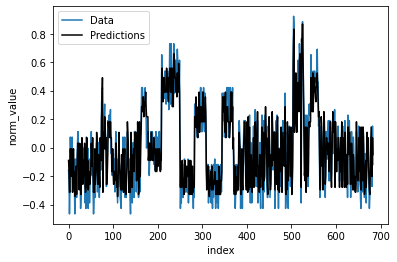

In [13]:
x=pd.DataFrame(test_labels.reshape(test_labels.shape[0],test_labels.shape[1]))
y=pd.DataFrame(result.reshape(result.shape[0],result.shape[1]))
plt.plot(x.index, x[0], label='Data')
plt.plot(y.index, y[0], color='k', label='Predictions')
plt.xlabel('index')
plt.ylabel('norm_value')
plt.legend()
plt.show()

In [14]:
model.save("./exported_models/LSTM_single_series")
print("Finish")
# model.save("./exported_models/ANN_single_series")
# print("Finish")
# converter = tf.lite.TFLiteConverter.from_saved_model("./exported_models/LSTM_single_series")
# tflite_model = converter.convert()
# open("./exported_models/tflite_model/LSTM_single_series.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: ./exported_models/LSTM_single_series/assets


INFO:tensorflow:Assets written to: ./exported_models/LSTM_single_series/assets


Finish


In [62]:
new_model = tf.keras.models.load_model("./exported_models/LSTM_single_series")
# new_model = tf.keras.models.load_model("./exported_models/ANN_single_series")

In [63]:
result_new = new_model.predict(test_features, batch_size=1, verbose=0)
print(test_features.shape)
print(result_new.shape)
new_model.summary()

(99, 6, 1)
(99, 6, 1)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6, 6)              12        
_________________________________________________________________
dense_4 (Dense)              (None, 6, 1)              7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


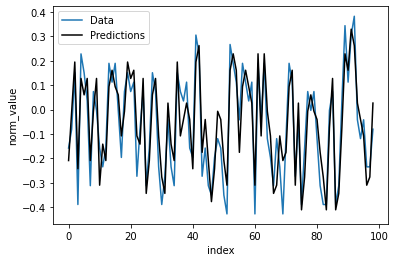

In [64]:
x=pd.DataFrame(test_labels.reshape(test_labels.shape[0],test_labels.shape[1]))
y=pd.DataFrame(result_new.reshape(result_new.shape[0],result_new.shape[1]))
plt.plot(x.index, x[0], label='Data')
plt.plot(y.index, y[0], color='k', label='Predictions')
plt.xlabel('index')
plt.ylabel('norm_value')
plt.legend()
plt.show()

In [65]:
# concrete_func = new_model.signatures[tf.saved_model.DEFAULT_SERVING_SIGNATURE_DEF_KEY]
# concrete_func.inputs[0].set_shape([None, 6, 1])
# converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])

converter = tf.compat.v1.lite.TFLiteConverter.from_saved_model("./exported_models/LSTM_single_series")
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.experimental_new_converter = True
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
# converter = tf.compat.v1.lite.TFLiteConverter.from_saved_model("./exported_models/ANN_single_series")
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
# converter.experimental_new_converter = True
# converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]

INFO:tensorflow:Restoring parameters from ./exported_models/LSTM_single_series/variables/variables


INFO:tensorflow:Restoring parameters from ./exported_models/LSTM_single_series/variables/variables


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'__saved_model_init_op', 'serving_default'}


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'__saved_model_init_op', 'serving_default'}


INFO:tensorflow:input tensors info: 


INFO:tensorflow:input tensors info: 


INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_3_input


INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_3_input


INFO:tensorflow: tensor name: serving_default_dense_3_input:0, shape: (-1, 6, 1), type: DT_FLOAT


INFO:tensorflow: tensor name: serving_default_dense_3_input:0, shape: (-1, 6, 1), type: DT_FLOAT


INFO:tensorflow:output tensors info: 


INFO:tensorflow:output tensors info: 


INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_4


INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_4


INFO:tensorflow: tensor name: StatefulPartitionedCall:0, shape: (-1, 6, 1), type: DT_FLOAT


INFO:tensorflow: tensor name: StatefulPartitionedCall:0, shape: (-1, 6, 1), type: DT_FLOAT


INFO:tensorflow:Restoring parameters from ./exported_models/LSTM_single_series/variables/variables


INFO:tensorflow:Restoring parameters from ./exported_models/LSTM_single_series/variables/variables


INFO:tensorflow:Restoring parameters from ./exported_models/LSTM_single_series/variables/variables


INFO:tensorflow:Restoring parameters from ./exported_models/LSTM_single_series/variables/variables


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'__saved_model_init_op', 'serving_default'}


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'__saved_model_init_op', 'serving_default'}


INFO:tensorflow:input tensors info: 


INFO:tensorflow:input tensors info: 


INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_3_input


INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_3_input


INFO:tensorflow: tensor name: serving_default_dense_3_input:0, shape: (-1, 6, 1), type: DT_FLOAT


INFO:tensorflow: tensor name: serving_default_dense_3_input:0, shape: (-1, 6, 1), type: DT_FLOAT


INFO:tensorflow:output tensors info: 


INFO:tensorflow:output tensors info: 


INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_4


INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_4


INFO:tensorflow: tensor name: StatefulPartitionedCall:0, shape: (-1, 6, 1), type: DT_FLOAT


INFO:tensorflow: tensor name: StatefulPartitionedCall:0, shape: (-1, 6, 1), type: DT_FLOAT


INFO:tensorflow:Restoring parameters from ./exported_models/LSTM_single_series/variables/variables


INFO:tensorflow:Restoring parameters from ./exported_models/LSTM_single_series/variables/variables


In [66]:
tflite_model = converter.convert()
open("./exported_models/tflite_model/LSTM_single_series.tflite", "wb").write(tflite_model)
# tflite_model = converter.convert()
# open("./exported_models/tflite_model/ANN_single_series.tflite", "wb").write(tflite_model)

Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the f

8096

In [67]:
import tflite_runtime.interpreter as tflite
batch_input = [2,6,1]
interpreter = tflite.Interpreter("./exported_models/tflite_model/LSTM_single_series.tflite")
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
# interpreter.resize_tensor_input(input_details[0]['index'],batch_input)
# interpreter.resize_tensor_input(output_details[0]['index'],batch_input)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
interpreter.allocate_tensors()
print(input_details)
print(output_details)

[{'name': 'serving_default_dense_3_input', 'index': 0, 'shape': array([1, 6, 1], dtype=int32), 'shape_signature': array([-1,  6,  1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall', 'index': 31, 'shape': array([1, 1, 1], dtype=int32), 'shape_signature': array([-1, -1,  1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [68]:
def prediction(pas_series):
        # return self.LSTM_model.predict(pas_series, batch_size=1, verbose=0)
        input_var = np.array(pas_series, dtype='f')
        interpreter.set_tensor(input_details[0]['index'], input_var)
        interpreter.invoke()
        y = interpreter.get_tensor(output_details[0]['index']) 
        return y

In [69]:
np_array = test_features[0]
np_array = np.array(np_array)[np.newaxis,:,:]
print(np_array.shape)

(1, 6, 1)


In [70]:
print(prediction(np_array))

[[[-0.209]
  [-0.276]
  [-0.343]
  [-0.242]
  [-0.175]
  [-0.108]]]


In [71]:
result_new = new_model.predict(np_array, batch_size=1, verbose=0)
print(np_array.shape)
print(np_array)
print(result_new.shape)
print(result_new)

(1, 6, 1)
[[[-0.235]
  [-0.312]
  [-0.389]
  [-0.273]
  [-0.196]
  [-0.119]]]
(1, 6, 1)
[[[-0.209]
  [-0.276]
  [-0.343]
  [-0.242]
  [-0.175]
  [-0.108]]]
